# Stock Market and Portfolio Anaylsis Tech Stocks and the S&P 500 in 2020 with pandas_datareader and writing to at sqlite database

This post includes code adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading) and the [documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_sql.html)

In [40]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# # start = datetime.datetime(2016, 1, 1)
# # end = datetime.datetime(2017, 5, 17)

# start = datetime.datetime(2010, 1, 1)
# end = datetime.datetime(2020, 1, 1)

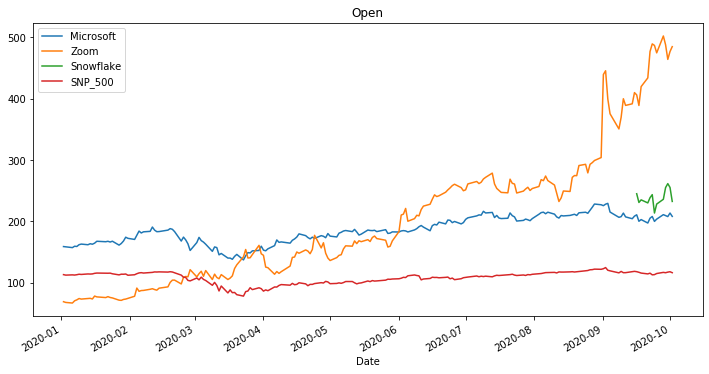

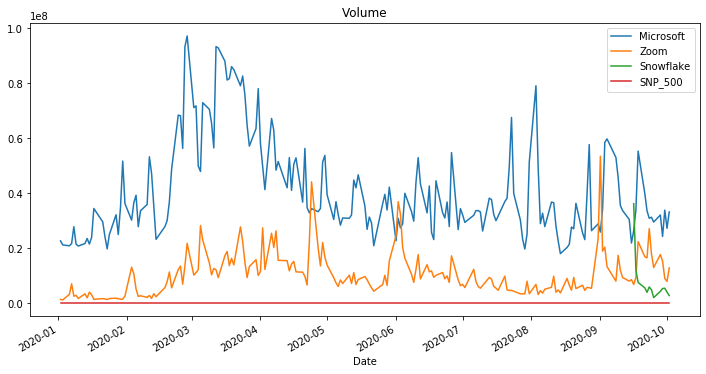

In [42]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('today')


FXAIX_stock = web.DataReader('FXAIX', 'yahoo', start, end)
FXAIX_stock.head()

MSFT_stock = web.DataReader('MSFT', 'yahoo', start, end)
MSFT_stock.head()

ZOOM_stock = web.DataReader('ZM', 'yahoo', start, end)
ZOOM_stock.head()

SNOW_stock = web.DataReader('SNOW', 'yahoo', start, end)
SNOW_stock.head()


fig = plt.figure(figsize=(12, 6))
plt.title('Open')

MSFT_stock['Open'].plot(label='Microsoft')
ZOOM_stock['Open'].plot(label='Zoom')
SNOW_stock['Open'].plot(label='Snowflake')
FXAIX_stock['Open'].plot(label='SNP_500')
plt.legend()

fig = plt.figure(figsize=(12, 6))
plt.title('Volume')

MSFT_stock['Volume'].plot(label='Microsoft')
ZOOM_stock['Volume'].plot(label='Zoom')
SNOW_stock['Volume'].plot(label='Snowflake')
FXAIX_stock['Volume'].plot(label='SNP_500')

plt.legend()

In [43]:
FXAIX_stock = web.DataReader('FXAIX', 'yahoo', start, end)
FXAIX_stock.head()

MSFT_stock = web.DataReader('MSFT', 'yahoo', start, end)
MSFT_stock.head()

ZOOM_stock = web.DataReader('ZM', 'yahoo', start, end)
ZOOM_stock.head()

SNOW_stock = web.DataReader('SNOW', 'yahoo', start, end)
SNOW_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-16,319.0,231.110001,245.000000,253.929993,36099700,253.929993
2020-09-17,241.5,215.240005,230.759995,227.539993,11907500,227.539993
2020-09-18,249.0,218.589996,235.000000,240.000000,7475400,240.000000
2020-09-21,241.5,218.600006,230.000000,228.850006,5524900,228.850006
2020-09-22,239.0,225.149994,238.500000,235.160004,3889100,235.160004


In [44]:
stocks = pd.concat([MSFT_stock['Open'], ZOOM_stock['Open'], SNOW_stock['Open'], FXAIX_stock['Open']],
                   axis = 1)

In [45]:
stocks

,Open,Open,Open,Open
Date,,,,
2020-01-02,158.779999,68.800003,NaN,112.980003
2020-01-03,158.320007,67.620003,NaN,112.190002
2020-01-06,157.080002,66.629997,NaN,112.589996
2020-01-07,159.320007,70.290001,NaN,112.290001
2020-01-08,158.929993,71.809998,NaN,112.839996
...,...,...,...,...
2020-09-28,210.880005,502.410004,235.929993,116.650002
2020-09-29,209.350006,488.130005,255.000000,116.099998
2020-09-30,207.729996,464.209991,261.500000,117.070000


In [46]:
stocks.columns = ['MSFT_stock','ZOOM_stock','SNOW_stock','FXAIX_stock']

In [47]:
stocks

,MSFT_stock,ZOOM_stock,SNOW_stock,FXAIX_stock
Date,,,,
2020-01-02,158.779999,68.800003,NaN,112.980003
2020-01-03,158.320007,67.620003,NaN,112.190002
2020-01-06,157.080002,66.629997,NaN,112.589996
2020-01-07,159.320007,70.290001,NaN,112.290001
2020-01-08,158.929993,71.809998,NaN,112.839996
...,...,...,...,...
2020-09-28,210.880005,502.410004,235.929993,116.650002
2020-09-29,209.350006,488.130005,255.000000,116.099998
2020-09-30,207.729996,464.209991,261.500000,117.070000


In [48]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

MSFT_stock     0.001751
ZOOM_stock     0.011973
SNOW_stock    -0.002546
FXAIX_stock    0.000440
dtype: float64

In [49]:
stocks.pct_change(1).corr()

,MSFT_stock,ZOOM_stock,SNOW_stock,FXAIX_stock
MSFT_stock,1.000000,0.209041,0.661827,0.382807
ZOOM_stock,0.209041,1.000000,0.095052,0.127526
SNOW_stock,0.661827,0.095052,1.000000,0.292117
FXAIX_stock,0.382807,0.127526,0.292117,1.000000


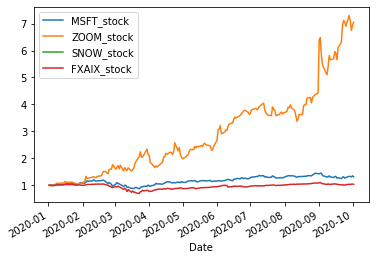

In [50]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [51]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,MSFT_stock,ZOOM_stock,SNOW_stock,FXAIX_stock
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.002897,-0.017151,NaN,-0.006992
2020-01-06,-0.007832,-0.014641,NaN,0.003565
2020-01-07,0.014260,0.054930,NaN,-0.002664
2020-01-08,-0.002448,0.021625,NaN,0.004898


In [52]:
log_ret = np.log(stocks / stocks.shift(1))
log_ret.head()

,MSFT_stock,ZOOM_stock,SNOW_stock,FXAIX_stock
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.002901,-0.017300,NaN,-0.007017
2020-01-06,-0.007863,-0.014749,NaN,0.003559
2020-01-07,0.014160,0.053475,NaN,-0.002668
2020-01-08,-0.002451,0.021394,NaN,0.004886


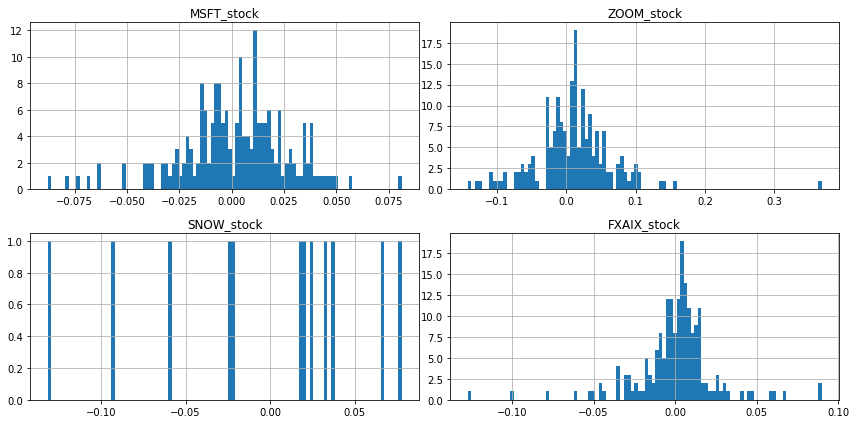

In [53]:
log_ret.hist(bins = 100,
             figsize = (12, 6));
plt.tight_layout()

In [54]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSFT_stock,190.0,0.001421,0.025752,-0.087821,-0.012115,0.004000,0.016980,0.081248
ZOOM_stock,190.0,0.010279,0.056461,-0.142569,-0.017014,0.011119,0.035968,0.368600
SNOW_stock,12.0,-0.004386,0.063753,-0.131433,-0.033113,0.019477,0.034320,0.077728
FXAIX_stock,190.0,0.000144,0.024461,-0.127150,-0.007774,0.002806,0.010082,0.089894


In [55]:
log_ret.mean() * 252

MSFT_stock     0.358130
ZOOM_stock     2.590236
SNOW_stock    -1.105148
FXAIX_stock    0.036359
dtype: float64

In [56]:
log_ret.cov()

,MSFT_stock,ZOOM_stock,SNOW_stock,FXAIX_stock
MSFT_stock,0.000663,0.000323,0.001291,0.000245
ZOOM_stock,0.000323,0.003188,0.000290,0.000184
SNOW_stock,0.001291,0.000290,0.004064,0.000231
FXAIX_stock,0.000245,0.000184,0.000231,0.000598


In [57]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['MSFT_stock', 'ZOOM_stock', 'SNOW_stock', 'FXAIX_stock'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
1.272564336318203


Expected Volatility
0.4864366288684257


Sharpe Ratio
2.6160948020680697


In [58]:
num_ports = 15000

all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

In [59]:
sharpe_arr.max()

2.8667995807841824

In [60]:
sharpe_arr.argmax()

5483

In [61]:
all_weights[10619,:]

array([5.06395348e-01, 4.67772019e-04, 2.64242193e-01, 2.28894687e-01])

In [62]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

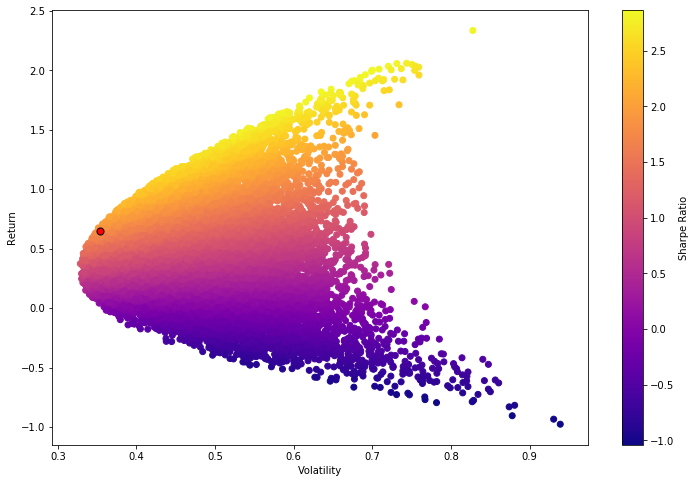

In [63]:
plt.figure(figsize = (12, 8))
plt.scatter(vol_arr,
            ret_arr,
            c = sharpe_arr,
            cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,
            max_sr_ret,
            c = 'red',
            s = 50,
            edgecolors = 'black')

In [64]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

from scipy.optimize import minimize
import numpy as np

def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type' : 'eq', 'fun': check_sum})

# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

# Initial Guess (equal distribution)
init_guess = [0.25, 0.25, 0.25, 0.25]

# Sequential Least Squares 
opt_results = minimize(neg_sharpe,
                       init_guess,
                       method = 'SLSQP',
                       bounds = bounds,
                       constraints = cons)

opt_results

     fun: -2.8998675936504807
     jac: array([-3.57061625e-04,  6.75618649e-05,  1.98669076e+00,  1.90789163e-01])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.59222977e-01, 8.40777023e-01, 7.68699340e-16, 0.00000000e+00])

In [65]:
opt_results.x

get_ret_vol_sr(opt_results.x)

array([2.23483308, 0.77066728, 2.89986759])

In [66]:
frontier_y = np.linspace(0, 0.3, 100)

In [67]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,
                      init_guess,
                      method = 'SLSQP',
                      bounds = bounds,
                      constraints = cons)
    
    frontier_volatility.append(result['fun'])

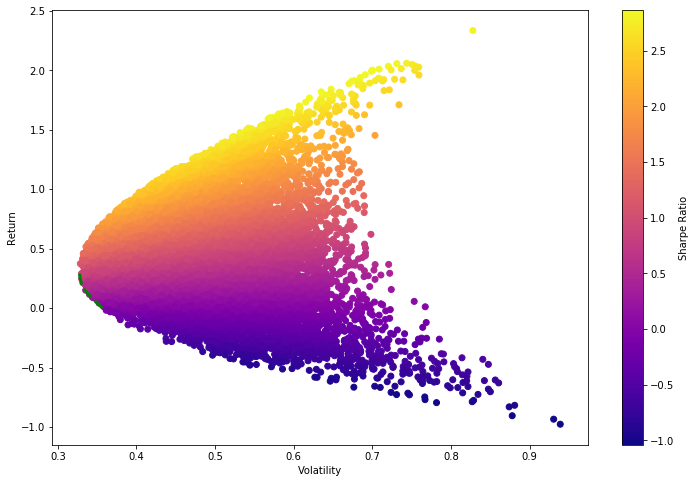

In [68]:
plt.figure(figsize = (12, 8))
plt.scatter(vol_arr,
            ret_arr,
            c = sharpe_arr,
            cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,
         frontier_y,
         'g--',
         linewidth = 3)

Text(0.5, 1.0, 'Total S&P 500 in 2020 Value')

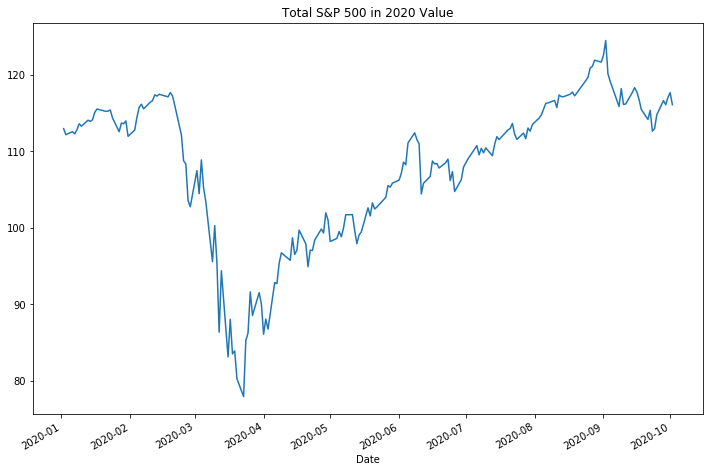

In [69]:
stocks['FXAIX_stock'].plot(figsize = (12, 8))
plt.title('Total S&P 500 in 2020 Value')

In [70]:
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

In [71]:
stocks

,MSFT_stock,ZOOM_stock,SNOW_stock,FXAIX_stock
Date,,,,
2020-01-02,158.779999,68.800003,NaN,112.980003
2020-01-03,158.320007,67.620003,NaN,112.190002
2020-01-06,157.080002,66.629997,NaN,112.589996
2020-01-07,159.320007,70.290001,NaN,112.290001
2020-01-08,158.929993,71.809998,NaN,112.839996
...,...,...,...,...
2020-09-28,210.880005,502.410004,235.929993,116.650002
2020-09-29,209.350006,488.130005,255.000000,116.099998
2020-09-30,207.729996,464.209991,261.500000,117.070000


In [72]:
engine = db.create_engine('sqlite:///stocks.sqlite')

In [73]:
connection = engine.connect()
metadata = db.MetaData()

In [74]:
stocks.to_sql('stocks', con=engine, if_exists='append', index=True)

In [75]:
engine.execute("SELECT * FROM stocks LIMIT 10").fetchall()

[(158.77999877929688, 68.80000305175781, None, 112.9800033569336),
 (158.32000732421875, 67.62000274658203, None, 112.19000244140625),
 (157.0800018310547, 66.62999725341797, None, 112.58999633789062),
 (159.32000732421875, 70.29000091552734, None, 112.29000091552734),
 (158.92999267578125, 71.80999755859375, None, 112.83999633789062),
 (161.83999633789062, 73.98999786376953, None, 113.62000274658203),
 (162.82000732421875, 73.08000183105469, None, 113.30000305175781),
 (161.75999450683594, 73.88999938964844, None, 114.08999633789062),
 (163.38999938964844, 74.31999969482422, None, 113.93000030517578),
 (162.6199951171875, 73.27999877929688, None, 114.13999938964844)]

In [76]:
engine.execute("SELECT FXAIX_stock FROM stocks LIMIT 10").fetchall()

[(112.9800033569336,),
 (112.19000244140625,),
 (112.58999633789062,),
 (112.29000091552734,),
 (112.83999633789062,),
 (113.62000274658203,),
 (113.30000305175781,),
 (114.08999633789062,),
 (113.93000030517578,),
 (114.13999938964844,)]

In [77]:
# df = pd.DataFrame({'name' : ['User 1', 'User 2', 'User 3']})
# df

# df.to_sql('users', con=engine)

# engine.execute("SELECT * FROM users").fetchall()